In [22]:
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import read_table

%matplotlib inline

In [23]:
filename = "/fefs/aswg/data/real/DL1/20201120/v0.7.3/tailcut84/dl1_LST-1.Run02969.0010.h5"

In [24]:
tablename = "/dl1/event/telescope/image/LST_LSTCam"
camera = read_table(filename, tablename)
tablename = "/dl1/event/telescope/parameters/LST_LSTCam"
params = read_table(filename, tablename)

In [25]:
print(camera.columns)
print(params.columns)

<TableColumns names=('obs_id','event_id','image','peak_time','tel_id','selected_gain_channel')>
<TableColumns names=('obs_id','event_id','intensity','log_intensity','x','y','r','phi','length','width','psi','skewness','kurtosis','time_gradient','intercept','leakage_intensity_width_1','leakage_intensity_width_2','leakage_pixels_width_1','leakage_pixels_width_2','n_pixels','concentration_cog','concentration_core','concentration_pixel','n_islands','alt_tel','az_tel','calibration_id','dragon_time','ucts_time','tib_time','mc_type','wl','tel_id','tel_pos_x','tel_pos_y','tel_pos_z','trigger_type','ucts_trigger_type','trigger_time','event_type')>


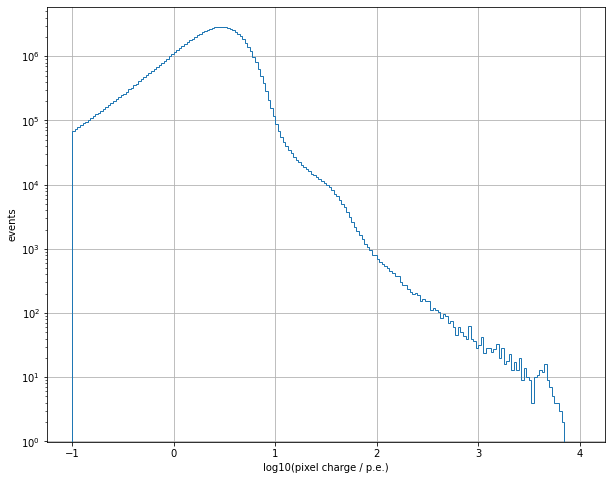

In [26]:
plt.figure(figsize=(10,8))

# select cosmics:
mask = (params['event_type']==32)

pix_charges = camera[mask]['image'].flatten() # all pixels together
pix_charges = pix_charges[pix_charges>0] # just to avoid warning on log of <0 values

plt.hist(np.log10(pix_charges), bins=200, range=(-1, 4), log=True, histtype='step')
plt.grid()
plt.xlabel('log10(pixel charge / p.e.)')
plt.ylabel('events')
plt.show()